# EDA

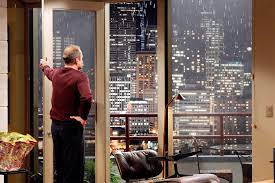

# Table of Content

[Link to a place assigned by the name in paretheses](#section-geo-map)



In [4]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Import and Clearning

The data is available on [the project in Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction). You can put the notebook into slides by (in terminal):

    jupyter nbconvert your_note_book.ipynb --to slides
    


In [5]:
# print out the definition of each column names
with open('column_names.md') as column_description:
    for line in column_description:
        if not '#' in line:
            print(line.replace('- **', '').replace('** -',' = '))

# read in the data and show first few rows
df = pd.read_csv("data/King_County_House_prices_dataset.csv")
df.head(10)



id =  unique identified for a house

dateDate =  house was sold

pricePrice =  is prediction target

sqft_livingsquare =  footage of the home

sqft_lotsquare =  footage of the lot

floorsTotal =  floors (levels) in house

waterfront =  House which has a view to a waterfront

view =  Has been viewed

condition =  How good the condition is ( Overall )

grade =  overall grade given to the housing unit, based on King County grading system

sqft_above =  square footage of house apart from basement

sqft_basement =  square footage of the basement

yr_built =  Built Year

yr_renovated =  Year when house was renovated

zipcode =  zip

lat =  Latitude coordinate

long =  Longitude coordinate

sqft_living15 =  The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 =  The square footage of the land lots of the nearest 15 neighbors



id        date       price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.000         3      1.000         1180   
1  6414100192   12/9/2014  538000.000         3      2.250         2570   
2  5631500400   2/25/2015  180000.000         2      1.000          770   
3  2487200875   12/9/2014  604000.000         4      3.000         1960   
4  1954400510   2/18/2015  510000.000         3      2.000         1680   
5  7237550310   5/12/2014 1230000.000         4      4.500         5420   
6  1321400060   6/27/2014  257500.000         3      2.250         1715   
7  2008000270   1/15/2015  291850.000         3      1.500         1060   
8  2414600126   4/15/2015  229500.000         3      1.000         1780   
9  3793500160   3/12/2015  323000.000         3      2.500         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650   1.000         NaN 0.000  ...      7        1180            0.0   
1      7242   2.000       0.000 0.000  ...      7        2170          400.0   
2     10000   1.000       0.000 0.000  ...      6         770            0.0   
3      5000   1.000       0.000 0.000  ...      7        1050          910.0   
4      8080   1.000       0.000 0.000  ...      8        1680            0.0   
5    101930   1.000       0.000 0.000  ...     11        3890         1530.0   
6      6819   2.000       0.000 0.000  ...      7        1715              ?   
7      9711   1.000       0.000   NaN  ...      7        1060            0.0   
8      7470   1.000       0.000 0.000  ...      7        1050          730.0   
9      6560   2.000       0.000 0.000  ...      7        1890            0.0   

  yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0     1955         0.000    98178 47.511 -122.257           1340        5650  
1     1951      1991.000    98125 47.721 -122.319           1690        7639  
2     1933           NaN    98028 47.738 -122.233           2720        8062  
3     1965         0.000    98136 47.521 -122.393           1360        5000  
4     1987         0.000    98074 47.617 -122.045           1800        7503  
5     2001         0.000    98053 47.656 -122.005           4760      101930  
6     1995         0.000    98003 47.310 -122.327           2238        6819  
7     1963         0.000    98198 47.410 -122.315           1650        9711  
8     1960         0.000    98146 47.512 -122.337           1780        8113  
9     2003         0.000    98038 47.368 -122.031           2390        7570  

[10 rows x 21 columns]

In [6]:
# check if doplicated data
df['id'].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

There are duplicated houses, which might mean the house was sold several times. We will handle this later.

In [7]:
# structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We need to clean the data first:
- date column to datetime
- price from float to integer
- floors from float to integer
- waterfront from float to boolean (there are NaN)
- view from float to integer (there are NaN)
- sqft_basement from object(there are strings) to integer
- yr_renovated from float(there are NaN) to integer



In [8]:
# date to datetime 
df['date'] = pd.to_datetime(df['date'])
# price to int
df['price'] = df['price'].apply( lambda x : int(x))
# floors to int
df['floors'] = df['floors'].apply( lambda x : int(x))
# waterfront to boolean
def waterfront_conversion(x):
    x = str(x)
    try:
        x = int(float(x))
        if x == 1:
            return 1
        else:
            return 0
    except:
        return 0
df['waterfront'] = df['waterfront'].apply(waterfront_conversion)
# view to int
df[pd.isnull(df['view'])] = df[pd.isnull(df['view'])].assign(view = 0)  # set null values to 0
df['view'] = df['view'].apply( lambda x : int(x))
# sqft_basement to int
def size_conversion(x):
    x = str(x)
    try:
        return int(float(x))
    except:
        return 0
df['sqft_basement'] = df['sqft_basement'].apply(size_conversion)
# yr_renovated to int (NaN => 0)
df['yr_renovated'] = df['yr_renovated'].apply(size_conversion)

# store a copy of the cleaned dataframe
df_clean = df.copy()

# check data types for cleanend dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  int64         
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  int64         
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

Handling duplicated data.

In [9]:
# create a dataframe contains only duplicates
#   first we create a list for the id of duplicates
df_tmp = df_clean[df_clean['id'].duplicated()]
id_with_duplicate = df_tmp['id']
id_with_duplicate
#   then we get the duplicate dataframe sorted by id and then by date
df_dpc = df_clean[df_clean['id'].isin(id_with_duplicate)]#.sort_values(by=['id', 'date'])
df_dpc
  
# revise the original dataframe by removing the older duplicates
df = df.sort_values('date')
df = df[~df['id'].duplicated()]
df

df_dpc['time_difference'] = 0
df_dpc['is_renovated'] = False
for id in id_with_duplicate:
    row = df_dpc.query('id == @id').index
    t = df_dpc.query('id == @id')['date'].tolist()
    df_dpc.at[row[0], 'time_difference'] = (t[1] - t[0]).days
    df_dpc.at[row[1], 'time_difference'] = (t[1] - t[0]).days
    if df_dpc.loc[row[0], 'yr_renovated'] != 0:
        df_dpc.at[row[0], 'is_renovated'] = True
        df_dpc.at[row[1], 'is_renovated'] = True

Check the basic statistics:

In [10]:
df.describe()

id       price  bedrooms  bathrooms  sqft_living  \
count      21420.000   21420.000 21420.000  21420.000    21420.000   
mean  4580939869.158  540739.304     3.374      2.118     2083.133   
std   2876761172.448  367931.110     0.925      0.769      918.808   
min      1000102.000   78000.000     1.000      0.500      370.000   
25%   2123537386.750  322500.000     3.000      1.750     1430.000   
50%   3904921185.000  450000.000     3.000      2.250     1920.000   
75%   7308900186.250  645000.000     4.000      2.500     2550.000   
max   9900000190.000 7700000.000    33.000      8.000    13540.000   

         sqft_lot    floors  waterfront      view  condition     grade  \
count   21420.000 21420.000   21420.000 21420.000  21420.000 21420.000   
mean    15128.038     1.448       0.007     0.234      3.411     7.663   
std     41530.797     0.552       0.082     0.765      0.650     1.172   
min       520.000     1.000       0.000     0.000      1.000     3.000   
25%      5040.000     1.000       0.000     0.000      3.000     7.000   
50%      7614.000     1.000       0.000     0.000      3.000     7.000   
75%     10690.500     2.000       0.000     0.000      4.000     8.000   
max   1651359.000     3.000       1.000     4.000      5.000    13.000   

       sqft_above  sqft_basement  yr_built  yr_renovated   zipcode       lat  \
count   21420.000      21420.000 21420.000     21420.000 21420.000 21420.000   
mean     1791.170        285.904  1971.093        68.957 98077.874    47.560   
std       828.693        440.008    29.387       364.552    53.477     0.139   
min       370.000          0.000  1900.000         0.000 98001.000    47.156   
25%      1200.000          0.000  1952.000         0.000 98033.000    47.471   
50%      1560.000          0.000  1975.000         0.000 98065.000    47.572   
75%      2220.000        550.000  1997.000         0.000 98117.000    47.678   
max      9410.000       4820.000  2015.000      2015.000 98199.000    47.778   

           long  sqft_living15  sqft_lot15  
count 21420.000      21420.000   21420.000  
mean   -122.214       1988.384   12775.718  
std       0.141        685.537   27345.622  
min    -122.519        399.000     651.000  
25%    -122.328       1490.000    5100.000  
50%    -122.230       1840.000    7620.000  
75%    -122.125       2370.000   10086.250  
max    -121.315       6210.000  871200.000

# Observing Features of the Data

## Geo Map <a class="anchor" id="section-geo-map"></a>

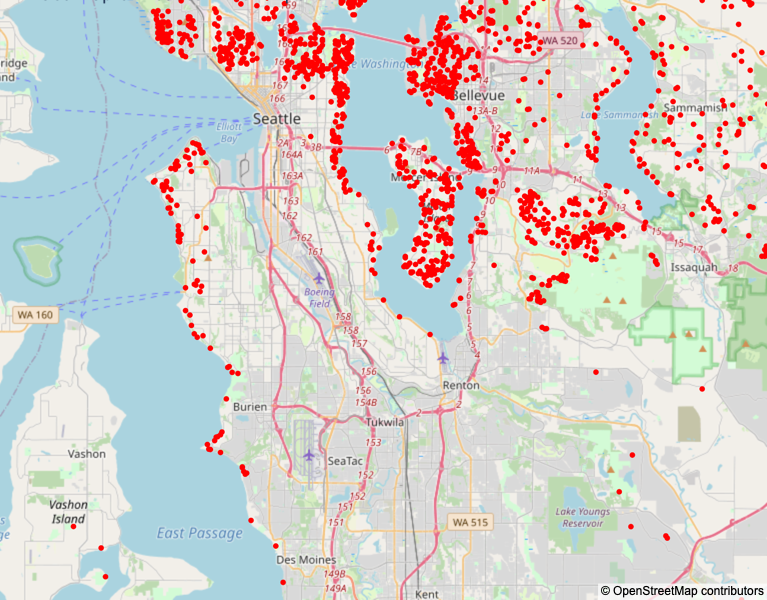

In [11]:
import plotly.express as px
df['price_log10_scale'] = df['price'].apply(np.log10)

# house positions
fig = px.scatter_mapbox(df.query('price > price.mean()+1*price.std()'), lat="lat", lon="long",
                        hover_name="id", hover_data=["price", "sqft_living"],
                        color_discrete_sequence=["red"],
                        #color = "price",
                        #opacity = 0.2,
                        zoom=10, height=600,
                        #size = 'price_log10_scale',
                        #size_max = 10,
                        center = dict(lat=47.5193, lon=-122.257),
                        title="Geo Map of Houses Price: Expensive")
# background map
fig.update_layout(mapbox_style="open-street-map",)

#fig.update_geos(fitbounds="locations")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

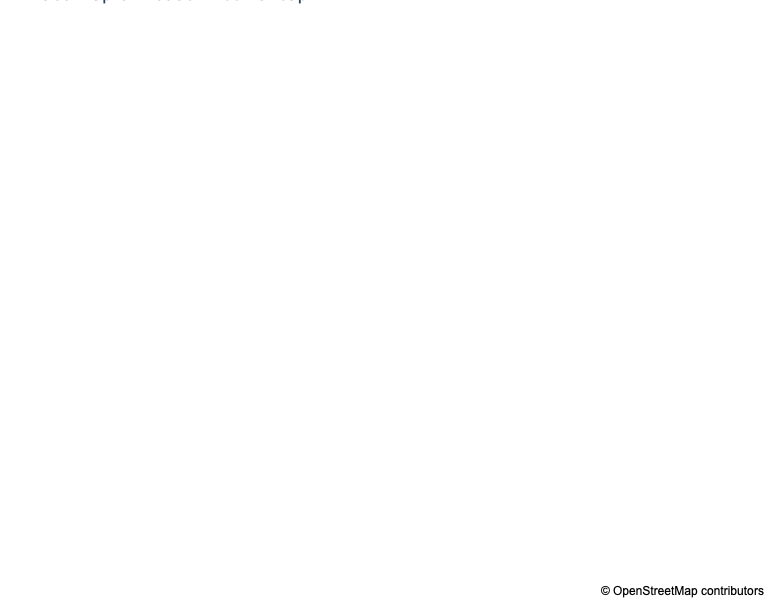

In [12]:
import plotly.express as px

# house positions
fig = px.scatter_mapbox(df.query('price < price.mean()-1*price.std()'), lat="lat", lon="long",
                        hover_name="id", hover_data=["price", "sqft_living"],
                        color_discrete_sequence=["blue"],
                        #color = "price",
                        #opacity = 0.2,
                        zoom=10, height=600,
                        #size = 'price_log10_scale',
                        #size_max = 10,
                        center = dict(lat=47.5193, lon=-122.257),
                        title="Geo Map of House Price: Cheap")
# background map
fig.update_layout(mapbox_style="open-street-map",)

#fig.update_geos(fitbounds="locations")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

## Correlation

In [13]:
correlation_matrix = df[['price', 'sqft_living', 'sqft_lot', 'grade', 'condition', 'yr_built']].corr()
correlation_matrix

price  sqft_living  sqft_lot  grade  condition  yr_built
price        1.000        0.702     0.089  0.668      0.035     0.053
sqft_living  0.702        1.000     0.173  0.762     -0.062     0.317
sqft_lot     0.089        0.173     1.000  0.114     -0.009     0.052
grade        0.668        0.762     0.114  1.000     -0.151     0.446
condition    0.035       -0.062    -0.009 -0.151      1.000    -0.365
yr_built     0.053        0.317     0.052  0.446     -0.365     1.000

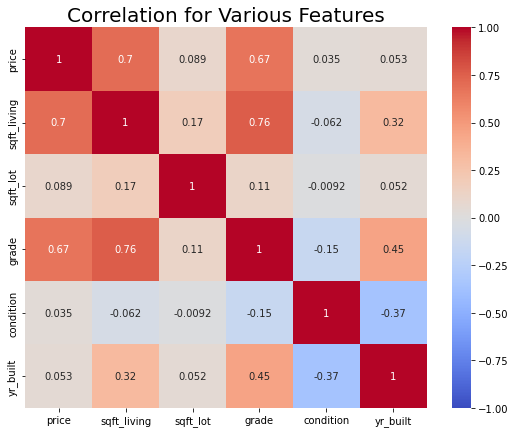

In [14]:
plt.figure(figsize = (9, 7))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
                 vmin=-1, vmax=1,)
#ax.set_xlabel("View", fontsize=20)
#ax.set_ylabel("Price", fontsize=20)
ax.set_title("Correlation for Various Features", fontsize=20)
plt.savefig('figure/d1_correlation.png', dpi=300);

## Distribution
### categorical

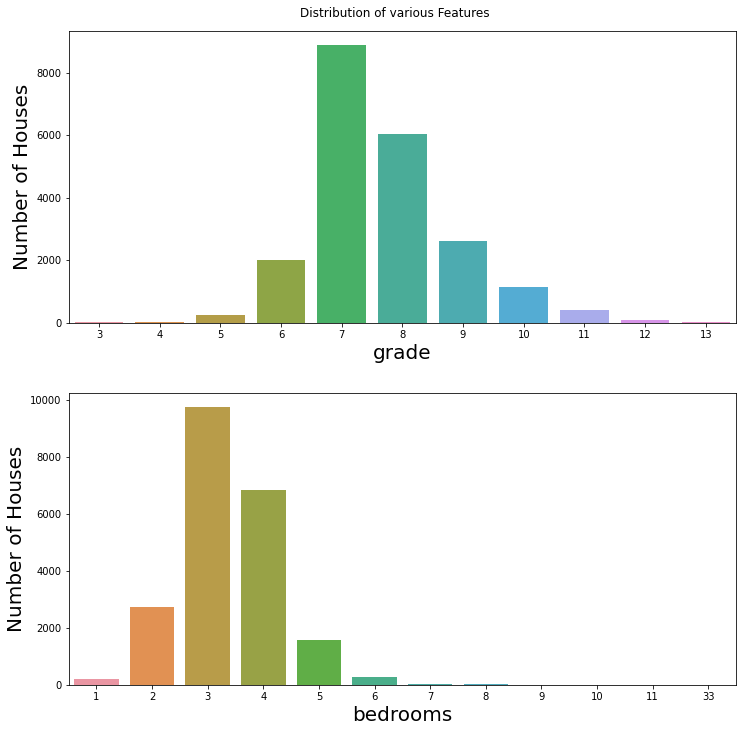

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
plt.suptitle('Distribution of various Features')
fig.tight_layout(h_pad=5)

fig1 = sns.countplot(x=df['grade'], ax=ax[0])
fig1.set_xlabel('grade', fontsize=20)
fig1.set_ylabel('Number of Houses', fontsize=20)

fig2 = sns.countplot(x=df['bedrooms'], ax=ax[1])
fig2.set_xlabel('bedrooms', fontsize=20)
fig2.set_ylabel('Number of Houses', fontsize=20);

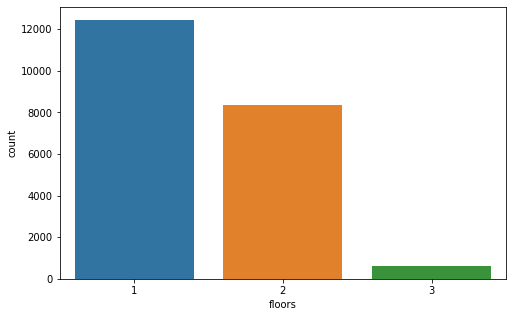

In [16]:
 sns.countplot(x=df['floors']);

### Numerical

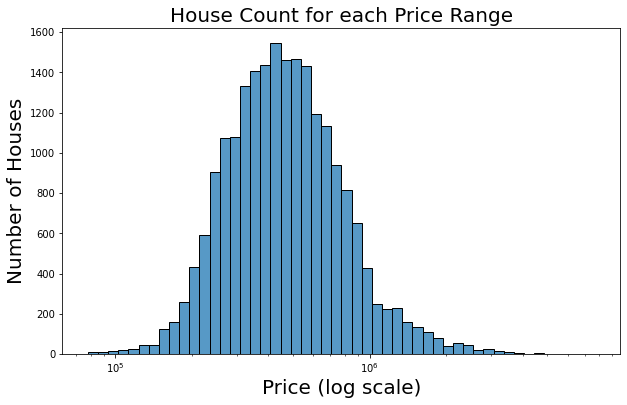

In [17]:
plt.figure(figsize = (10, 6))
ax = sns.histplot(data=df, x='price', 
                  bins=50, #binwidth=100000
                  log_scale=10
                 )
#ax.set(xlabel="price (log_10 scale)", ylabel = "Number of Houses")
ax.set_xlabel("Price (log scale)", fontsize=20)
ax.set_ylabel("Number of Houses", fontsize=20)
ax.set_title("House Count for each Price Range", fontsize=20)
plt.savefig('figure/d2_hist_price.png', dpi=300);

[Text(0.5, 0, 'Size of Basement'), Text(0, 0.5, 'Number of Houses')]

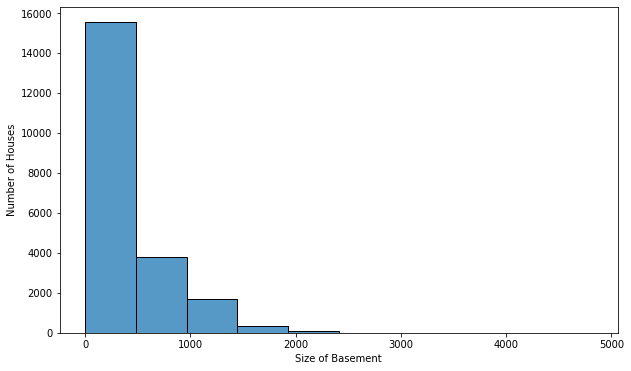

In [18]:
plt.figure(figsize = (10, 6))
ax = sns.histplot(data=df, x='sqft_basement', 
                  bins=10, #binwidth=100000
                  #log_scale=10
                 )
ax.set(xlabel="Size of Basement", ylabel = "Number of Houses")

## Box Plot


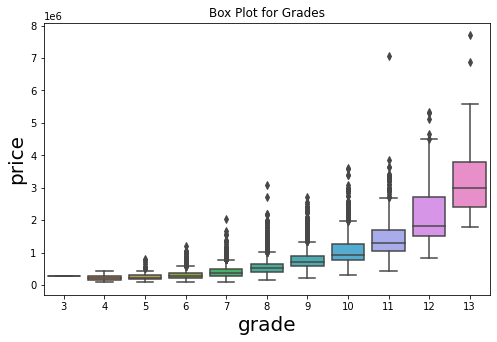

In [19]:
ax = sns.boxplot(x='grade', y ='price', data=df)
ax.set_xlabel("grade", fontsize=20)
ax.set_ylabel("price", fontsize=20)
ax.set_title("Box Plot for Grades");

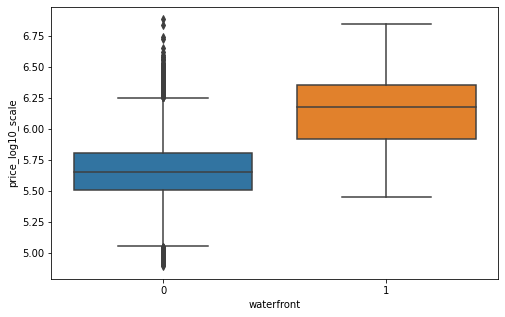

In [20]:
ax = sns.boxplot(x='waterfront', y ='price_log10_scale', data=df)

## Scatter Plot

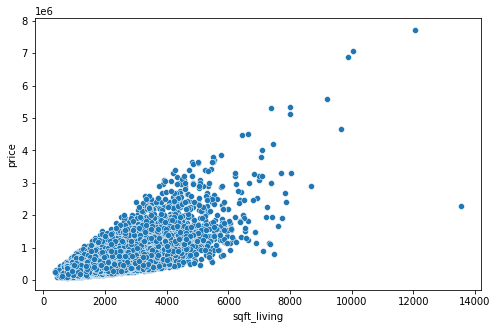

In [21]:
ax = sns.scatterplot(data=df, x = 'sqft_living', y = 'price')
#plt.savefig('out_fig.png')

# Hypothesis 1
If a house has more views, it will be cheaper.

The idea is, once a house received many views from buyers without a successful deal, the owner would want to lower the price to encourage buyers into taking the house.

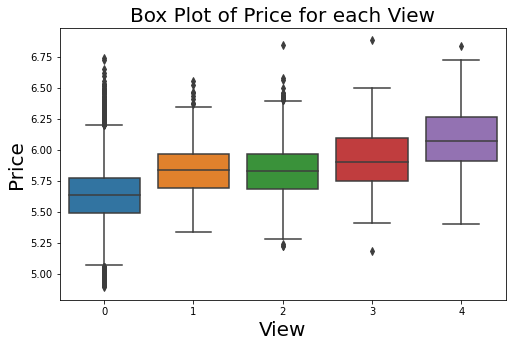

In [22]:
ax = sns.boxplot(x='view', y ='price_log10_scale', data=df)
ax.set_xlabel("View", fontsize=20)
ax.set_ylabel("Price", fontsize=20)
ax.set_title("Box Plot of Price for each View", fontsize=20)
plt.savefig('figure/h1_box_price_view.png', dpi=300);

It turns out that the hypothesis is false. From the figure above, we clearly see price increases with the number of view. This might be described by the reasoning: a house with more views means it is attractive, so the price is higher.

# Hypothesis 2

If a house has a high "score", its price will be high. Here, score means a certain combination of features of a house shown in the data. We will design the score by hands.

score = [ f(sqft_living) + f(sqft_lot) + f(grade) + f(condition) ]/4

where f is the normalization function defined as:

f(x) = x/(x_max - x_min)*100%

so the score will be somewhere from 0% to 100%.

In [23]:
# calculate the score
col_name = 'sqft_living'
df_score = df[col_name]/(df[col_name].max() - df[col_name].min())*100
col_name = 'sqft_lot'
df_score = df_score + df[col_name]/(df[col_name].max() - df[col_name].min())*100
col_name = 'grade'
df_score = df_score + df[col_name]/(df[col_name].max() - df[col_name].min())*100
col_name = 'condition'
df_score = df_score + df[col_name]/(df[col_name].max() - df[col_name].min())*100

# assign the score column to the original dataframe
df['score'] = df_score/4
df

id       date    price  bedrooms  bathrooms  sqft_living  \
7316   2202500290 2014-05-02   435000         4      1.000         1450   
20586  7853361370 2014-05-02   555000         4      2.500         3310   
1040   7197300105 2014-05-02   550000         4      2.500         1940   
20543  3438501320 2014-05-02   295000         2      2.500         1630   
9587    472000620 2014-05-02   790000         3      2.500         2600   
...           ...        ...      ...       ...        ...          ...   
19381  8149600265 2015-05-14   725000         4      1.750         1980   
12623  4166600610 2015-05-14   335000         3      2.000         1410   
5632   7923600250 2015-05-15   450000         5      2.000         1870   
13040  5101400871 2015-05-24   445500         2      1.750         1390   
16580  9106000005 2015-05-27  1310000         4      2.250         3750   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
7316       8800       1           0     0  ...              0      1954   
20586      6500       2           0     0  ...              0      2012   
1040      10500       1           0     0  ...            800      1976   
20543      1368       2           0     0  ...            350      2009   
9587       4750       1           0     0  ...            900      1951   
...         ...     ...         ...   ...  ...            ...       ...   
19381      5850       1           0     1  ...            600      1960   
12623     44866       1           0     0  ...              0      1985   
5632       7344       1           0     0  ...              0      1960   
13040      6670       1           0     0  ...            670      1941   
16580      5000       2           0     0  ...           1310      1924   

       yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  \
7316              0    98006 47.575 -122.135           1260        8942   
20586             0    98065 47.515 -121.870           2380        5000   
1040              0    98052 47.683 -122.114           2200       10500   
20543             0    98106 47.549 -122.363           1590        2306   
9587              0    98117 47.683 -122.400           2380        4750   
...             ...      ...    ...      ...            ...         ...   
19381             0    98116 47.561 -122.391           1810        5850   
12623             0    98023 47.327 -122.370           2950       29152   
5632              0    98007 47.595 -122.144           1870        7650   
13040             0    98115 47.691 -122.308            920        6380   
16580             0    98115 47.675 -122.303           2170        4590   

       price_log10_scale  score  
7316               5.638 45.386  
20586              5.744 45.132  
1040               5.740 46.342  
20543              5.470 39.365  
9587               5.898 52.507  
...                  ...    ...  
19381              5.860 48.847  
12623              5.525 45.856  
5632               5.653 39.911  
13040              5.649 36.490  
16580              6.117 58.444  

[21420 rows x 23 columns]

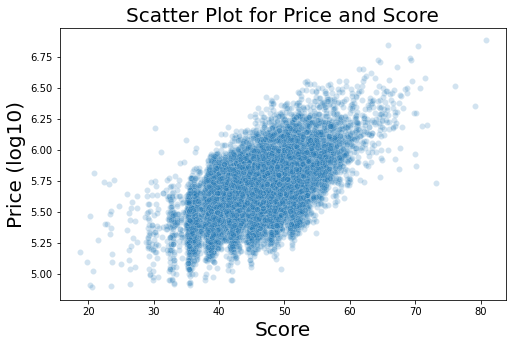

In [24]:
# scatter plot
ax = sns.scatterplot(data=df, x='score', y='price_log10_scale', alpha=0.2)
ax.set_xlabel("Score", fontsize=20)
ax.set_ylabel("Price (log10)", fontsize=20)
ax.set_title("Scatter Plot for Price and Score", fontsize=20)
plt.savefig('figure/h2_scatter_price_score.png', dpi=300);

# Hypothesis 3
If a house was renovated, it is more likely to be bought and sold quickly.


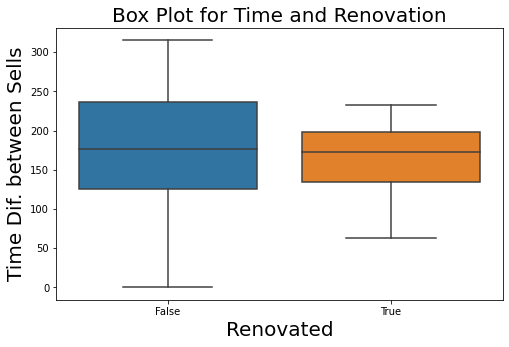

In [25]:
ax = sns.boxplot(x='is_renovated', y ='time_difference', data=df_dpc)
ax.set_xlabel("Renovated", fontsize=20)
ax.set_ylabel("Time Dif. between Sells", fontsize=20)
ax.set_title("Box Plot for Time and Renovation", fontsize=20)
plt.savefig('figure/h3_box_time_renovation.png', dpi=300);

As the result shows, whether a house is renovated is not a good indicator for quick house sells.